In [42]:
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import math
data = pd.read_csv("survey_results_public.csv")

In [31]:
data.head()

,ResponseId,Q120,MainBranch,Age,Employment,RemoteWork,CodingActivities,EdLevel,LearnCode,LearnCodeOnline,...,Frequency_1,Frequency_2,Frequency_3,TimeSearching,TimeAnswering,ProfessionalTech,Industry,SurveyLength,SurveyEase,ConvertedCompYearly
0,1,I agree,None of these,18-24 years old,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,I agree,I am a developer by profession,25-34 years old,"Employed, full-time",Remote,Hobby;Contribute to open-source projects;Boots...,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Books / Physical media;Colleague;Friend or fam...,Formal documentation provided by the owner of ...,...,1-2 times a week,10+ times a week,Never,15-30 minutes a day,15-30 minutes a day,DevOps function;Microservices;Automated testin...,"Information Services, IT, Software Development...",Appropriate in length,Easy,285000.0
2,3,I agree,I am a developer by profession,45-54 years old,"Employed, full-time","Hybrid (some remote, some in-person)",Hobby;Professional development or self-paced l...,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Books / Physical media;Colleague;On the job tr...,Formal documentation provided by the owner of ...,...,6-10 times a week,6-10 times a week,3-5 times a week,30-60 minutes a day,30-60 minutes a day,DevOps function;Microservices;Automated testin...,"Information Services, IT, Software Development...",Appropriate in length,Easy,250000.0
3,4,I agree,I am a developer by profession,25-34 years old,"Employed, full-time","Hybrid (some remote, some in-person)",Hobby,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Colleague;Friend or family member;Other online...,Formal documentation provided by the owner of ...,...,1-2 times a week,10+ times a week,1-2 times a week,15-30 minutes a day,30-60 minutes a day,Automated testing;Continuous integration (CI) ...,NaN,Appropriate in length,Easy,156000.0
4,5,I agree,I am a developer by profession,25-34 years old,"Employed, full-time;Independent contractor, fr...",Remote,Hobby;Contribute to open-source projects;Profe...,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Books / Physical media;Online Courses or Certi...,Formal documentation provided by the owner of ...,...,1-2 times a week,1-2 times a week,3-5 times a week,60-120 minutes a day,30-60 minutes a day,Microservices;Automated testing;Observability ...,Other,Appropriate in length,Neither easy nor difficult,23456.0


In [32]:
data.drop(["SurveyLength","SurveyEase","Frequency_1","Frequency_2","Frequency_3", "TimeSearching", "TimeAnswering", "NEWSOSites", "SOVisitFreq", "SOAccount", "SOPartFreq", "SOComm", "SOAI","TBranch",
"Knowledge_1","Knowledge_2", "Knowledge_3", "Knowledge_4", "Knowledge_5", "Knowledge_6", "Knowledge_7", "Knowledge_8"
],axis=1,inplace=True)

In [33]:
data.head()

,ResponseId,Q120,MainBranch,Age,Employment,RemoteWork,CodingActivities,EdLevel,LearnCode,LearnCodeOnline,...,AINextVery different,AINextNeither different nor similar,AINextSomewhat similar,AINextVery similar,AINextSomewhat different,ICorPM,WorkExp,ProfessionalTech,Industry,ConvertedCompYearly
0,1,I agree,None of these,18-24 years old,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,I agree,I am a developer by profession,25-34 years old,"Employed, full-time",Remote,Hobby;Contribute to open-source projects;Boots...,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Books / Physical media;Colleague;Friend or fam...,Formal documentation provided by the owner of ...,...,NaN,NaN,NaN,NaN,NaN,People manager,10.0,DevOps function;Microservices;Automated testin...,"Information Services, IT, Software Development...",285000.0
2,3,I agree,I am a developer by profession,45-54 years old,"Employed, full-time","Hybrid (some remote, some in-person)",Hobby;Professional development or self-paced l...,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Books / Physical media;Colleague;On the job tr...,Formal documentation provided by the owner of ...,...,NaN,NaN,NaN,NaN,NaN,Individual contributor,23.0,DevOps function;Microservices;Automated testin...,"Information Services, IT, Software Development...",250000.0
3,4,I agree,I am a developer by profession,25-34 years old,"Employed, full-time","Hybrid (some remote, some in-person)",Hobby,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Colleague;Friend or family member;Other online...,Formal documentation provided by the owner of ...,...,NaN,NaN,NaN,NaN,NaN,Individual contributor,7.0,Automated testing;Continuous integration (CI) ...,NaN,156000.0
4,5,I agree,I am a developer by profession,25-34 years old,"Employed, full-time;Independent contractor, fr...",Remote,Hobby;Contribute to open-source projects;Profe...,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Books / Physical media;Online Courses or Certi...,Formal documentation provided by the owner of ...,...,NaN,NaN,NaN,NaN,NaN,Individual contributor,6.0,Microservices;Automated testing;Observability ...,Other,23456.0


In [34]:
Alllanguages = data["LanguageHaveWorkedWith"].tolist()
languages = []
for l in Alllanguages:
    if isinstance(l,str):
        a=l.split(";")
        for j in a:
            if j not in languages and isinstance(j,str):
                languages.append(j)
    
print(languages)



['HTML/CSS', 'JavaScript', 'Python', 'Bash/Shell (all shells)', 'Go', 'PHP', 'Ruby', 'SQL', 'TypeScript', 'Ada', 'Clojure', 'Elixir', 'Java', 'Lisp', 'OCaml', 'Raku', 'Scala', 'Swift', 'Zig', 'Rust', 'C#', 'PowerShell', 'C++', 'Kotlin', 'Solidity', 'C', 'Perl', 'Dart', 'Haskell', 'Assembly', 'Delphi', 'R', 'Lua', 'MATLAB', 'VBA', 'Visual Basic (.Net)', 'Julia', 'F#', 'Groovy', 'APL', 'Objective-C', 'GDScript', 'Crystal', 'Cobol', 'Fortran', 'Prolog', 'Erlang', 'Apex', 'SAS', 'Nim', 'Flow']


In [35]:
LangDict = {}
for i in languages:
    LangDict[i] = data["LanguageHaveWorkedWith"].str.contains(i, na=False).sum()

LangDict


C:\Users\samue\AppData\Local\Temp\ipykernel_23424\463327641.py:3: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  LangDict[i] = data["LanguageHaveWorkedWith"].str.contains(i, na=False).sum()


{'HTML/CSS': 46396,
 'JavaScript': 55711,
 'Python': 43158,
 'Bash/Shell (all shells)': 0,
 'Go': 11592,
 'PHP': 16274,
 'Ruby': 5454,
 'SQL': 42623,
 'TypeScript': 34041,
 'Ada': 677,
 'Clojure': 1105,
 'Elixir': 2028,
 'Java': 63638,
 'Lisp': 1342,
 'OCaml': 614,
 'Raku': 156,
 'Scala': 2422,
 'Swift': 4072,
 'Zig': 729,
 'Rust': 11427,
 'C#': 24193,
 'PowerShell': 11902,
 'C++': 65678,
 'Kotlin': 7935,
 'Solidity': 1168,
 'C': 65678,
 'Perl': 2151,
 'Dart': 5273,
 'Haskell': 1829,
 'Assembly': 4753,
 'Delphi': 2831,
 'R': 18875,
 'Lua': 5336,
 'MATLAB': 3339,
 'VBA': 3107,
 'Visual Basic (.Net)': 0,
 'Julia': 1010,
 'F#': 849,
 'Groovy': 2976,
 'APL': 225,
 'Objective-C': 2019,
 'GDScript': 1495,
 'Crystal': 389,
 'Cobol': 576,
 'Fortran': 833,
 'Prolog': 776,
 'Erlang': 868,
 'Apex': 579,
 'SAS': 427,
 'Nim': 331,
 'Flow': 214}

([<matplotlib.axis.XTick at 0x1e01333d850>,
 [Text(0, 0, 'HTML/CSS'),
  Text(1, 0, 'JavaScript'),
  Text(2, 0, 'Python'),
  Text(3, 0, 'Bash/Shell (all shells)'),
  Text(4, 0, 'Go'),
  Text(5, 0, 'PHP'),
  Text(6, 0, 'Ruby'),
  Text(7, 0, 'SQL'),
  Text(8, 0, 'TypeScript'),
  Text(9, 0, 'Ada'),
  Text(10, 0, 'Clojure'),
  Text(11, 0, 'Elixir'),
  Text(12, 0, 'Java'),
  Text(13, 0, 'Lisp'),
  Text(14, 0, 'OCaml'),
  Text(15, 0, 'Raku'),
  Text(16, 0, 'Scala'),
  Text(17, 0, 'Swift'),
  Text(18, 0, 'Zig'),
  Text(19, 0, 'Rust'),
  Text(20, 0, 'C#'),
  Text(21, 0, 'PowerShell'),
  Text(22, 0, 'C++'),
  Text(23, 0, 'Kotlin'),
  Text(24, 0, 'Solidity'),
  Text(25, 0, 'C'),
  Text(26, 0, 'Perl'),
  Text(27, 0, 'Dart'),
  Text(28, 0, 'Haskell'),
  Text(29, 0, 'Assembly'),
  Text(30, 0, 'Delphi'),
  Text(31, 0, 'R'),
  Text(32, 0, 'Lua'),
  Text(33, 0, 'MATLAB'),
  Text(34, 0, 'VBA'),
  Text(35, 0, 'Visual Basic (.Net)'),
  Text(36, 0, 'Julia'),
  Text(37, 0, 'F#'),
  Text(38, 0, 'Groovy'),
  

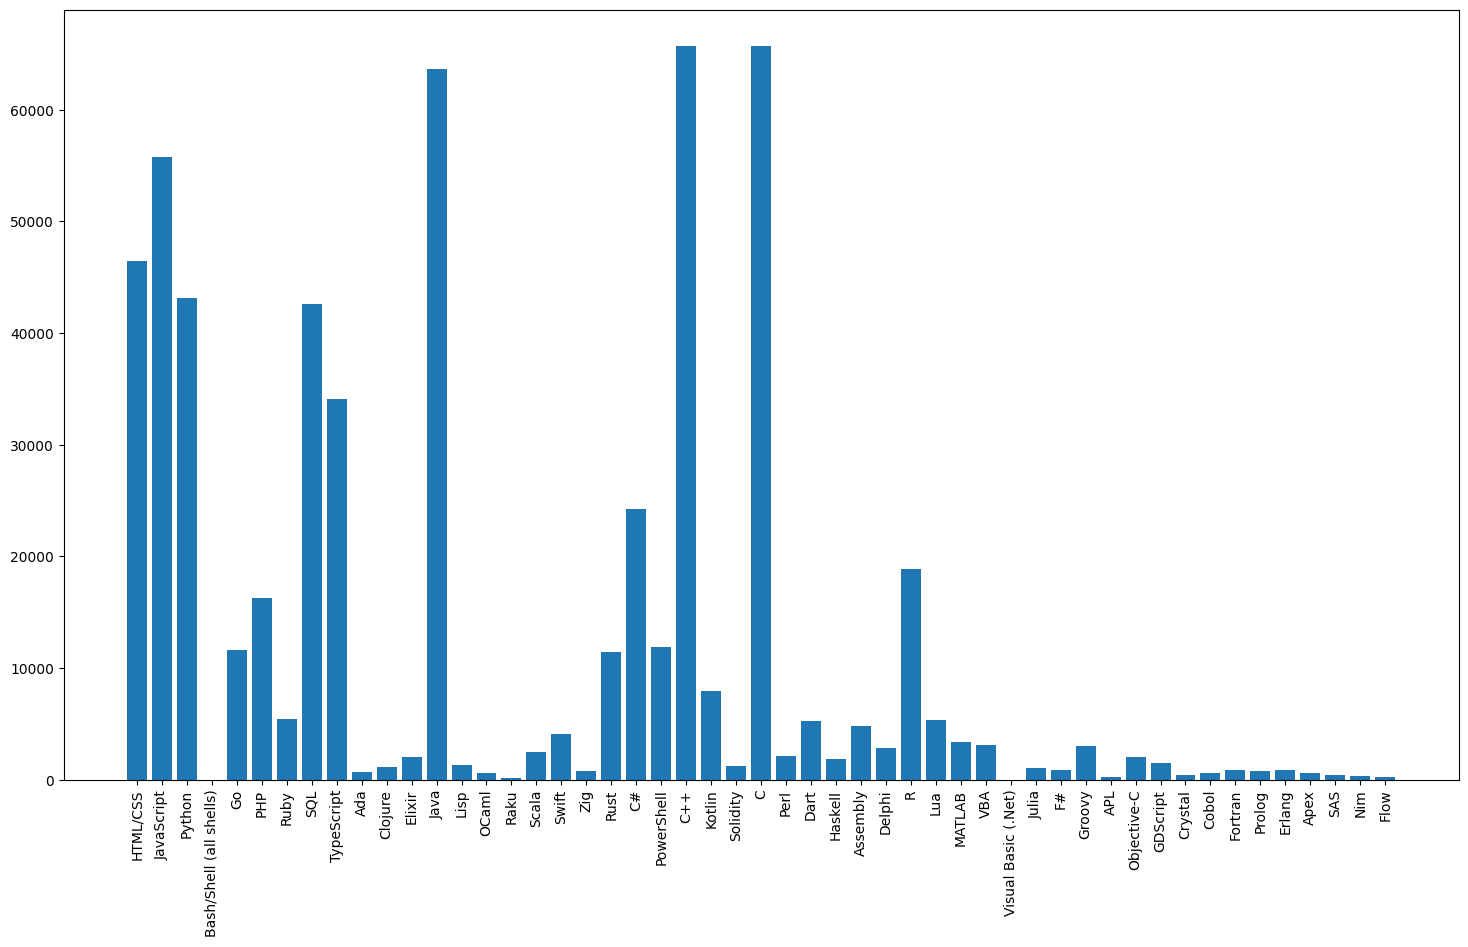

In [36]:


plt.rcParams["figure.figsize"] = (18, 10)

plt.bar(range(len(LangDict)), list(LangDict.values()), align='center')
plt.xticks(range(len(LangDict)), list(LangDict.keys()), rotation = 'vertical')

In [66]:
new = data.groupby(['Country'])['Country'].count()
new= pd.DataFrame(new)
new = new.rename(columns={'Country': 'Count'})
new=new.reset_index()
new[new['Count']== new['Count'].max()]



,Country,Count
177,United States of America,18647


In [84]:
data[(data["Country"]=="United States of America") & (data["CompTotal"] > 100000) & (data["WorkExp"]<2)][["DevType","PlatformHaveWorkedWith","CompTotal","LanguageHaveWorkedWith"]].sort_values(by=['CompTotal'],ascending=False)


,DevType,PlatformHaveWorkedWith,CompTotal,LanguageHaveWorkedWith
69005,"Developer, back-end",NaN,400000.0,Assembly;Bash/Shell (all shells);C;C++;HTML/CS...
35727,Data scientist or machine learning specialist,Amazon Web Services (AWS),300000.0,Python;SQL
75879,Security professional,Amazon Web Services (AWS);Microsoft Azure,250000.0,Bash/Shell (all shells);JavaScript;Python;Ruby
70957,Hardware Engineer,NaN,250000.0,Bash/Shell (all shells);C++;Kotlin;Lisp;Lua;Py...
36585,Other (please specify):,Google Cloud;Heroku,238000.0,Bash/Shell (all shells);C++;Python
...,...,...,...,...
74459,"Developer, back-end",Amazon Web Services (AWS),103000.0,Java;SQL
54732,"Developer, front-end",Amazon Web Services (AWS),102500.0,Bash/Shell (all shells);HTML/CSS;TypeScript
66329,"Developer, full-stack",Amazon Web Services (AWS);Digital Ocean,102000.0,Bash/Shell (all shells);HTML/CSS;JavaScript;Py...
42471,"Developer, back-end",NaN,102000.0,C#;HTML/CSS;Java;JavaScript;SQL
